# Food Image Classification Analysis

# Imports

In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageFile

from sklearn.model_selection import train_test_split


# Constants

In [3]:
PATH = "/Users/maukanmir/Downloads/food-cl/"
BATCH_SIZE = 32
INPUT_SHAPE = (224,224,3)

# Functions

In [14]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def pre_process_images(img_path, target_size=INPUT_SHAPE):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size[:2])
      img = img.convert("RGB")
      img_array = np.array(img)/255.0
      img_array = img_array.astype(np.float32)
      return img_array
  except IOError as e:
    print(f"The following image was unable to be processed:{e}")
    return None

def load_images(path):
  
  images, labels = [], []
  
  for root, dir, files in os.walk(path):
    for file in files:
      if file.lower().endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join(root, file)
        img = pre_process_images(img_path)
        if img is not None:
          images.append(img)
          label = root.split(os.sep)[-1]
          labels.append(label)
  
  return np.array(images), np.array(labels)

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels= unique, startangle=140, autopct="%1.1f%%")
  plt.title('Target Class Breakdown')
  plt.show()
  
  plt.figure(figsize=(10, 7))
  sns.countplot(x=target)
  plt.title("Target Class Breakdown")
  plt.xlabel("Target Classes")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()
  

# Load In Images

In [9]:
X, y = load_images(PATH)

In [10]:
print(f"Shape of Images: {X.shape}")
print(f"Shape of Labels: {y.shape}")

Shape of Images: (426, 224, 224, 3)
Shape of Labels: (426,)


# Check Class Imabalance

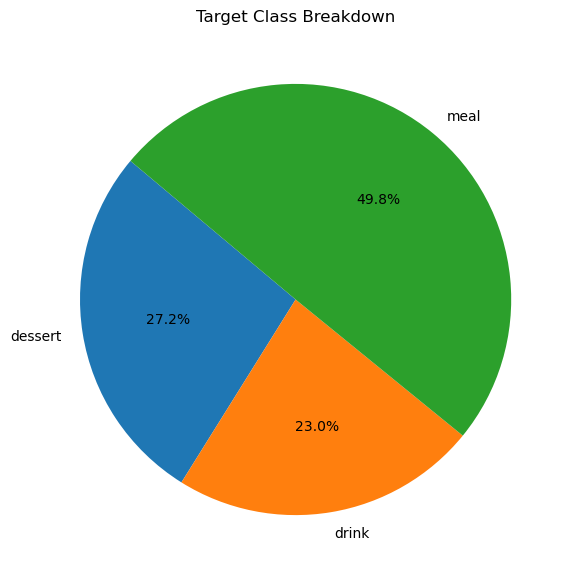

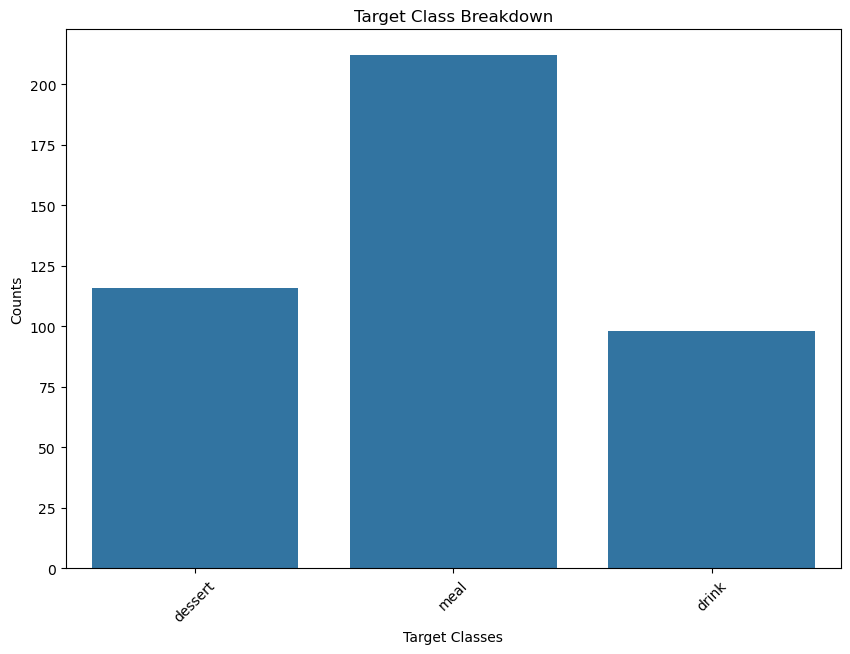

In [15]:
check_class_imbalance(y)

# Class Imbalance Exists

# Lets Take a look at some of our images